In [1]:
import netCDF4 as nc
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from pylibs.plot_utils import set_size, setupax_2dmap

In [2]:
ncfile = '/glade/work/swei/data/RawOBS/AERDB_SNPP/AERDB_L2_VIIRS_SNPP.A2024185.1436.002.2024186030336.nc'
ncd = nc.Dataset(ncfile, 'r')

In [37]:
lats = ncd.variables['Latitude'][:].ravel()
lons = ncd.variables['Longitude'][:].ravel()
vals = ncd.variables['Aerosol_Optical_Thickness_550_Land_Ocean_Best_Estimate'][:].ravel()
npts_land = ncd.variables['Number_Of_Pixels_Used_Land'][:].ravel()
npts_ocean = ncd.variables['Number_Of_Pixels_Used_Ocean'][:].ravel()

valid_pts = ~vals.mask
lats = lats[valid_pts]
lons = lons[valid_pts]
land_pts = np.logical_and(npts_land[valid_pts] > 0, npts_ocean[valid_pts] == 0)
ocean_pts = np.logical_and(npts_ocean[valid_pts] > 0, npts_land[valid_pts] == 0)
mix_pts = np.logical_and(npts_land[valid_pts] > 0, npts_ocean[valid_pts] > 0)

In [38]:
lsfs = np.zeros_like(lats, dtype=np.int32)

In [39]:
lsfs[ocean_pts] = 0
lsfs[land_pts] = 1
lsfs[mix_pts] = 2

masked_array(data=[10.440781, 10.407908, 10.39715 , ..., 29.053053,
                   27.767975, 27.734936],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [23]:
area_corner = [lats.min(), lats.max(), lons.min(), lons.max()]

In [34]:
pltmsk = valid_pts

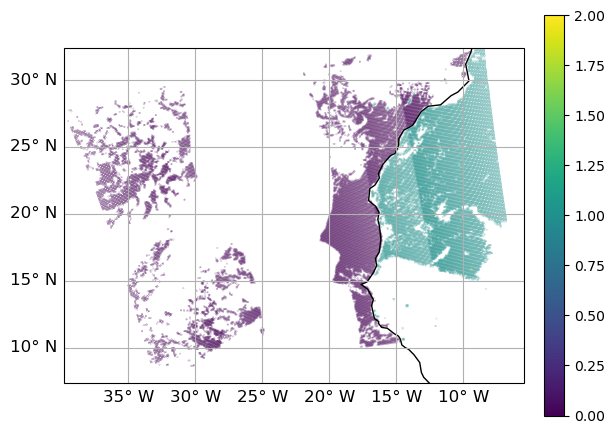

In [51]:
fig, ax, gl = setupax_2dmap(area_corner, None, ccrs.PlateCarree(), lbsize=12)
set_size(5,5)
sc = ax.scatter(lons, lats, c=lsfs, s=0.01)
plt.colorbar(sc, fraction=0.04, pad=0.04, aspect=20)

In [48]:
fig.savefig('land_sea_flag.DB.png', dpi=300)